In [18]:
import torch
import torchvision
import torchvision.transforms as transforms
torch.__version__
import matplotlib.pyplot as plt
import numpy as np

import torch.nn as nn
import torch.nn.functional as F

In [20]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=6,
                                          shuffle=True, num_workers=2)#size =4

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=6,
                                         shuffle=False, num_workers=2)#size =4

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


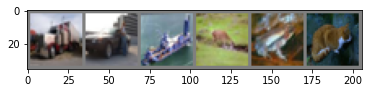

truck   car  ship  deer  frog   cat


In [21]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(6))) #size=4

In [22]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, 3, padding = 1)
        self.conv2 = nn.Conv2d(64, 64, 3, padding = 1)
        self.conv3 = nn.Conv2d(64, 128, 3, padding = 1)
        self.conv4 = nn.Conv2d(128, 128, 3, padding = 1)
        self.conv5 = nn.Conv2d(128, 256, 3, padding = 1)
        self.conv6 = nn.Conv2d(256, 256, 3, padding = 1)        
        self.conv7 = nn.Conv2d(256, 512, 3, padding = 1) #Ksize=3, pad=1, Height&Width dont change
        ###padding = 2, nn.Linear=512*3*3
        ###padding = 1, nn.Linear=512*2*2
        ###padding = 0, nn.Linear=512   with avgpool(2,2) YES!!!
        self.conv8 = nn.Conv2d(512, 512, 3, padding = 1)
        
        self.maxpool = nn.MaxPool2d(2, 2)
        self.avgpool = nn.AvgPool2d(2, 2)
        #self.globalavgpool = nn.AvgPool2d(8, 8)
        self.globalavgpool = nn.AvgPool2d(4,4)
        self.bn1 = nn.BatchNorm2d(64)
        self.bn2 = nn.BatchNorm2d(128)
        self.bn3 = nn.BatchNorm2d(256)
        self.bn4 = nn.BatchNorm2d(512)
        self.dropout50 = nn.Dropout(0.5)
        self.dropout10 = nn.Dropout(0.1)
        
        #mod
        #self.fch1=nn.Linear(512,128) #(256,xxx)
        #self.fch2=nn.Linear(512,64)
        self.fc = nn.Linear(512, 10) #256->233

 

    def forward(self, x):
        x = self.bn1(F.relu(self.conv1(x)))
        x = self.bn1(F.relu(self.conv2(x)))
        x = self.bn1(F.relu(self.conv2(x)))
        x = self.maxpool(x)                       #height =32/2=16
        x = self.dropout10(x)
        
        x = self.bn2(F.relu(self.conv3(x)))
        x = self.bn2(F.relu(self.conv4(x)))
        x = self.bn2(F.relu(self.conv4(x)))
        x=self.maxpool(x) #x = self.avgpool(x)    #height =16/2=8
        x = self.dropout10(x)
        
        x = self.bn3(F.relu(self.conv5(x)))
        x = self.bn3(F.relu(self.conv6(x)))
        x = self.bn3(F.relu(self.conv6(x)))
        x = self.avgpool(x)                       #height = 8/2 =4
        x = self.dropout10(x)
        
        
        x = self.bn4(F.relu(self.conv7(x)))
        x = self.bn4(F.relu(self.conv8(x)))
        x = self.bn4(F.relu(self.conv8(x)))
        x = self.globalavgpool(x)                 #height = 4/4 =1 when global is avgpool(4, stride=4)
        #x = self.avgpool(x)                      #height = 4/2 =2
        x = self.dropout50(x)
        
        x = x.view(x.size(0), -1)
        #print(x.size())
        #x = self.dropout10(F.relu(self.fch1(x)))
        #x = self.dropout10(F.relu(self.fch2(x)))
        x = self.fc(x)
        return x
net = Net()
print(net)

Net(
  (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv5): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv6): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv7): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv8): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (maxpool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (avgpool): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (globalavgpool): AvgPool2d(kernel_size=4, stride=4, padding=0)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, trac

In [23]:
type(nn.Conv2d)

type

In [160]:
m = (nn.MaxPool2d(8, 8))
inputs = torch.randn(20, 16, 50, 32)
output = m(inputs)
print(output.size())
F.relu(output).size()
output.view(output.size(0),-1).size()

torch.Size([20, 16, 6, 4])


torch.Size([20, 384])

In [24]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# device = torch.device("cpu")
# Assuming that we are on a CUDA machine, this should print a CUDA device:
print(device)

net.to(device)
print(net.conv1.bias.get_device())

cuda:0
0


In [25]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [26]:
epoch_num = 25
for epoch in range(epoch_num):  # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 1.853
[1,  4000] loss: 1.485
[1,  6000] loss: 1.271
[1,  8000] loss: 1.104
[2,  2000] loss: 0.988
[2,  4000] loss: 0.931
[2,  6000] loss: 0.902
[2,  8000] loss: 0.844
[3,  2000] loss: 0.737
[3,  4000] loss: 0.746
[3,  6000] loss: 0.740
[3,  8000] loss: 0.717
[4,  2000] loss: 0.627
[4,  4000] loss: 0.623
[4,  6000] loss: 0.623
[4,  8000] loss: 0.615
[5,  2000] loss: 0.508
[5,  4000] loss: 0.537
[5,  6000] loss: 0.511
[5,  8000] loss: 0.515
[6,  2000] loss: 0.444
[6,  4000] loss: 0.455
[6,  6000] loss: 0.446
[6,  8000] loss: 0.461
[7,  2000] loss: 0.356
[7,  4000] loss: 0.367
[7,  6000] loss: 0.415
[7,  8000] loss: 0.404
[8,  2000] loss: 0.311
[8,  4000] loss: 0.340
[8,  6000] loss: 0.342
[8,  8000] loss: 0.354
[9,  2000] loss: 0.267
[9,  4000] loss: 0.296
[9,  6000] loss: 0.307
[9,  8000] loss: 0.302
[10,  2000] loss: 0.230
[10,  4000] loss: 0.235
[10,  6000] loss: 0.273
[10,  8000] loss: 0.275
[11,  2000] loss: 0.188
[11,  4000] loss: 0.207
[11,  6000] loss: 0.245
[11,

In [27]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

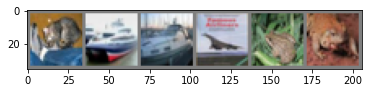

GroundTruth:    cat  ship  ship plane  frog  frog


In [28]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(6)))

In [29]:
#not necessary
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [30]:
outputs = net(images)

In [31]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(6)))

Predicted:    cat  ship  ship  ship  frog  frog


In [32]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 84 %


In [ ]:
#1 68% 4epochs loss->0.9
#2 10%!!! 4epochs loss->1.2 with 3 less conv
#3 51% 2epochs loss->1.4 with bn & 3 less conv
#4 57% 2epoches loss->1.2 with bn & 2 less conv
#5 65% 2epoches loss->0.991 with bn & 1 less conv; batchsize=6
#6 70% 2epoches loss->0.875 with bn & 8 convs; batchsize=6
#7 71% 2epoches loss->0.85 with bn & 9 convs; ONLY 1 FC layer batchsize=6
#8 81% 10epoches loss->0.28 with bn & 9 convs;ONLY 1 FC layer batchsize=6
#9 81% 12epoches loss->0.26 with bn & 9 convs;ONLY 1 FC layer batchsize=6
#10 ？% 17epoches loss->0.114 WIN10 BLUE SCREEN
#11 84% 25 epoches loss->
#11

In [33]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 86 %
Accuracy of   car : 91 %
Accuracy of  bird : 80 %
Accuracy of   cat : 69 %
Accuracy of  deer : 84 %
Accuracy of   dog : 76 %
Accuracy of  frog : 85 %
Accuracy of horse : 91 %
Accuracy of  ship : 91 %
Accuracy of truck : 90 %


In [ ]:
https://towardsdatascience.com/implementing-a-deep-neural-network-for-the-cifar-10-dataset-c6eb493008a5
    PLOT

In [ ]:
#8: 85 90 72 72 82 74 81 85 87 87 

In [ ]:
#3:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, 3, padding = 1)
        #self.conv2 = nn.Conv2d(64, 64, 3, padding = 1)
        self.conv3 = nn.Conv2d(64, 128, 3, padding = 1)
        #self.conv4 = nn.Conv2d(128, 128, 3, padding = 1)
        self.conv5 = nn.Conv2d(128, 256, 3, padding = 1)
        #self.conv6 = nn.Conv2d(256, 256, 3, padding = 1)
        self.maxpool = nn.MaxPool2d(2, 2)
        self.avgpool = nn.AvgPool2d(2, 2)
        self.globalavgpool = nn.AvgPool2d(8, 8)
        self.bn1 = nn.BatchNorm2d(64)
        self.bn2 = nn.BatchNorm2d(128)
        self.bn3 = nn.BatchNorm2d(256)
        self.dropout50 = nn.Dropout(0.5)
        self.dropout10 = nn.Dropout(0.1)
        
        #mod
        self.fch1=nn.Linear(256,128) #(256,xxx)
        #
        self.fch2=nn.Linear(128,64)
        self.fc = nn.Linear(64, 10) #256->233

 

    def forward(self, x):
        x = self.bn1(F.relu(self.conv1(x)))
        #x = self.bn1(F.relu(self.conv2(x)))
        x = self.maxpool(x)
        #x = self.dropout10(x)
        x = self.bn2(F.relu(self.conv3(x)))
        #x = self.bn2(F.relu(self.conv4(x)))
        #x = self.avgpool(x)
        ###
        x=self.maxpool(x)
        ###
        x = self.dropout10(x)
        x = self.bn3(F.relu(self.conv5(x)))
        #x = self.bn3(F.relu(self.conv6(x)))
        x = self.globalavgpool(x)
        x = self.dropout50(x)
        x = x.view(x.size(0), -1)
        #mod
        x = self.dropout10(F.relu(self.fch1(x)))
        #    
        x = self.dropout10(F.relu(self.fch2(x)))
        x = self.fc(x)
        return x
net = Net()
print(net)

In [ ]:
#6:
# full connected layers
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, 3, padding = 1)
        self.conv2 = nn.Conv2d(64, 64, 3, padding = 1)
        self.conv3 = nn.Conv2d(64, 128, 3, padding = 1)
        self.conv4 = nn.Conv2d(128, 128, 3, padding = 1)
        self.conv5 = nn.Conv2d(128, 256, 3, padding = 1)
        self.conv6 = nn.Conv2d(256, 256, 3, padding = 1)        
        self.conv7 = nn.Conv2d(256, 512, 3, padding = 1) #Ksize=3, pad=1, Height&Width dont change
        ###padding = 2, nn.Linear=512*3*3
        ###padding = 1, nn.Linear=512*2*2
        ###padding = 0, nn.Linear=512   with avgpool(2,2) YES!!!
        self.conv8 = nn.Conv2d(512, 512, 3, padding = 1)
        
        self.maxpool = nn.MaxPool2d(2, 2)
        self.avgpool = nn.AvgPool2d(2, 2)
        #self.globalavgpool = nn.AvgPool2d(8, 8)
        self.globalavgpool = nn.AvgPool2d(4,4)
        self.bn1 = nn.BatchNorm2d(64)
        self.bn2 = nn.BatchNorm2d(128)
        self.bn3 = nn.BatchNorm2d(256)
        self.bn4 = nn.BatchNorm2d(512)
        self.dropout50 = nn.Dropout(0.5)
        self.dropout10 = nn.Dropout(0.1)
        
        #mod
        #self.fch1=nn.Linear(512,128) #(256,xxx)
        self.fch2=nn.Linear(512,64)
        self.fc = nn.Linear(64, 10) #256->233

 

    def forward(self, x):
        x = self.bn1(F.relu(self.conv1(x)))
        x = self.bn1(F.relu(self.conv2(x)))
        x = self.maxpool(x)                       #height =32/2=16
        x = self.dropout10(x)
        
        x = self.bn2(F.relu(self.conv3(x)))
        x = self.bn2(F.relu(self.conv4(x)))
        x=self.maxpool(x) #x = self.avgpool(x)    #height =16/2=8
        x = self.dropout10(x)
        
        x = self.bn3(F.relu(self.conv5(x)))
        x = self.bn3(F.relu(self.conv6(x)))
        #x = self.bn3(F.relu(self.conv6(x))) #!
        x = self.avgpool(x)                       #height = 8/2 =4
        x = self.dropout10(x)
        
        
        x = self.bn4(F.relu(self.conv7(x)))
        x = self.bn4(F.relu(self.conv8(x)))
        x = self.globalavgpool(x)                 #height = 4/4 =1 when global is avgpool(4, stride=4)
        #x = self.avgpool(x)                      #height = 4/2 =2
        x = self.dropout50(x)
        
        x = x.view(x.size(0), -1)
        #print(x.size())
        #x = self.dropout10(F.relu(self.fch1(x)))
        x = self.dropout10(F.relu(self.fch2(x)))
        x = self.fc(x)
        return x
net = Net()
print(net)

In [ ]:
#9:
#12 Conv
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, 3, padding = 1)
        self.conv2 = nn.Conv2d(64, 64, 3, padding = 1)
        self.conv3 = nn.Conv2d(64, 128, 3, padding = 1)
        self.conv4 = nn.Conv2d(128, 128, 3, padding = 1)
        self.conv5 = nn.Conv2d(128, 256, 3, padding = 1)
        self.conv6 = nn.Conv2d(256, 256, 3, padding = 1)        
        self.conv7 = nn.Conv2d(256, 512, 3, padding = 1) #Ksize=3, pad=1, Height&Width dont change
        ###padding = 2, nn.Linear=512*3*3
        ###padding = 1, nn.Linear=512*2*2
        ###padding = 0, nn.Linear=512   with avgpool(2,2) YES!!!
        self.conv8 = nn.Conv2d(512, 512, 3, padding = 1)
        
        self.maxpool = nn.MaxPool2d(2, 2)
        self.avgpool = nn.AvgPool2d(2, 2)
        #self.globalavgpool = nn.AvgPool2d(8, 8)
        self.globalavgpool = nn.AvgPool2d(4,4)
        self.bn1 = nn.BatchNorm2d(64)
        self.bn2 = nn.BatchNorm2d(128)
        self.bn3 = nn.BatchNorm2d(256)
        self.bn4 = nn.BatchNorm2d(512)
        self.dropout50 = nn.Dropout(0.5)
        self.dropout10 = nn.Dropout(0.1)
        
        #mod
        #self.fch1=nn.Linear(512,128) #(256,xxx)
        #self.fch2=nn.Linear(512,64)
        self.fc = nn.Linear(512, 10) #256->233

 

    def forward(self, x):
        x = self.bn1(F.relu(self.conv1(x)))
        x = self.bn1(F.relu(self.conv2(x)))
        x = self.bn1(F.relu(self.conv2(x)))
        x = self.maxpool(x)                       #height =32/2=16
        x = self.dropout10(x)
        
        x = self.bn2(F.relu(self.conv3(x)))
        x = self.bn2(F.relu(self.conv4(x)))
        x = self.bn2(F.relu(self.conv4(x)))
        x=self.maxpool(x) #x = self.avgpool(x)    #height =16/2=8
        x = self.dropout10(x)
        
        x = self.bn3(F.relu(self.conv5(x)))
        x = self.bn3(F.relu(self.conv6(x)))
        x = self.bn3(F.relu(self.conv6(x)))
        x = self.avgpool(x)                       #height = 8/2 =4
        x = self.dropout10(x)
        
        
        x = self.bn4(F.relu(self.conv7(x)))
        x = self.bn4(F.relu(self.conv8(x)))
        x = self.bn4(F.relu(self.conv8(x)))
        x = self.globalavgpool(x)                 #height = 4/4 =1 when global is avgpool(4, stride=4)
        #x = self.avgpool(x)                      #height = 4/2 =2
        x = self.dropout50(x)
        
        x = x.view(x.size(0), -1)
        #print(x.size())
        #x = self.dropout10(F.relu(self.fch1(x)))
        #x = self.dropout10(F.relu(self.fch2(x)))
        x = self.fc(x)
        return x
net = Net()
print(net)

cite:first CNN proposed
Backpropagation Applied to Handwritten Zip Code Recognition
Show all authors
Y. LeCun, B. Boser, J. S. Denker, D. Henderson,

Posted Online March 13, 2008
https://doi.org/10.1162/neco.1989.1.4.541
© 1989 Massachusetts Institute of Technology

Neural Computation
Volume 1 | Issue 4 | Winter 1989
p.541-551